In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [88]:
train=pd.read_csv("H:/Machine Learning Algorithms/Random Forest/train.csv")
print(train.shape)

(891, 12)


In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
Na=pd.concat([train.isnull().sum()],axis=1,keys=["Train"])
Na[Na.sum(axis=1)>0]

,Train
Age,177
Cabin,687
Embarked,2


In [91]:
train["Age"]=train["Age"].fillna(train["Age"].mean())

In [92]:
train["Embarked"]=train["Embarked"].fillna(train["Embarked"].mode()[0])

In [93]:
train["Cabin"]=train["Cabin"].fillna(train["Cabin"].mode()[0])

In [94]:
train["Pclass"]=train["Pclass"].apply(str)

In [95]:
for col in train.dtypes[train.dtypes == "object"].index:
    for_dummy=train.pop(col)
    train=pd.concat([train,pd.get_dummies(for_dummy,prefix=col)],axis=1)
train.head()
    

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
Y_label=train["Survived"]
X_labels=train.drop(["Survived"],axis=1)
Y_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_labels,Y_label,test_size=0.25)

In [171]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=15)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=15)

In [172]:
y_predict=rf.predict(X_test)

In [173]:
y_predict

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [174]:
Y_test

266    0
368    1
329    1
666    0
734    0
      ..
90     0
758    0
784    0
478    0
503    0
Name: Survived, Length: 223, dtype: int64

In [175]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [176]:
print(confusion_matrix(Y_test,y_predict))

[[136   7]
 [ 20  60]]


In [177]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       143
           1       0.90      0.75      0.82        80

    accuracy                           0.88       223
   macro avg       0.88      0.85      0.86       223
weighted avg       0.88      0.88      0.88       223



In [178]:
accuracy_score(Y_test,y_predict)

0.8789237668161435

In [179]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,y_predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.8505244755244755

In [106]:
n_estimators=[1,2,4,8,16,32,64,100,200]
train_result=[]
test_result=[]

for estimator in n_estimators:
    rf.fit(X_train,Y_train)
    train_predict=rf.predict(X_train)
    false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_train,train_predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    train_result.append(roc_auc)
    Y_predict=rf.predict(X_test)
    false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,Y_predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    test_result.append(roc_auc)
 
    

<function matplotlib.pyplot.show(close=None, block=None)>

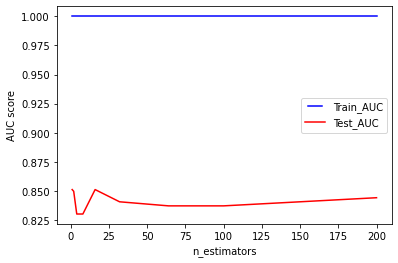

In [107]:
from matplotlib.legend_handler import HandlerLine2D
line1, =plt.plot(n_estimators,train_result,"b",label="Train_AUC")
line2, =plt.plot(n_estimators,test_result,"r",label="Test_AUC")
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show